In [261]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from time import perf_counter

In [262]:
def matrix_power(matrix, n):
    if n == 0:
        size = len(matrix)
        return [[1 if i == j else 0 for j in range(size)] for i in range(size)]
    elif n == 1:
        return matrix
    else:
        result = matrix
        for _ in range(n - 1):
            result = matrix_multiply(result, matrix)
        return result

def matrix_multiply(matrix1, matrix2):
    rows1, cols1 = len(matrix1), len(matrix1[0])
    rows2, cols2 = len(matrix2), len(matrix2[0])

    if cols1 != rows2:
        raise ValueError("Incompatible matrix dimensions")

    result = [[0 for _ in range(cols2)] for _ in range(rows1)]

    for i in range(rows1):
        for j in range(cols2):
            for k in range(cols1):
                result[i][j] += matrix1[i][k] * matrix2[k][j]

    return result


15
Graph with 15 nodes and 27 edges
[[0 1 1 1 1 0 1 1 1 1 0 0 0 0 0]
 [1 0 1 1 0 1 1 0 0 0 1 1 1 0 0]
 [1 1 0 0 1 1 0 1 0 0 1 0 0 1 1]
 [1 1 0 0 0 0 0 0 1 0 0 1 0 0 0]
 [1 0 1 0 0 0 0 0 0 1 0 0 0 1 0]
 [0 1 1 0 0 0 0 0 0 0 0 0 1 0 1]
 [1 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 1 0 0 0 0 0 0 0 0 0]]


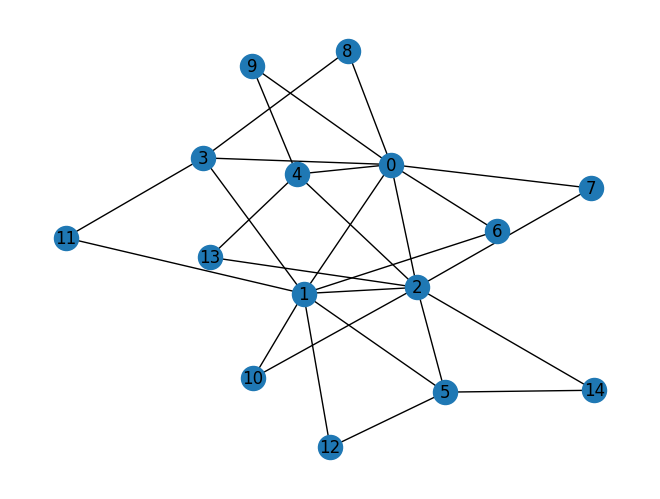

In [263]:
# G = nx.generators.atlas.graph_atlas(1250)
inp = 3
G = nx.dorogovtsev_goltsev_mendes_graph(inp)
n = (3 * (3**(inp-1) + 1)) // 2
print(n)
print(G)
nx.draw(G, with_labels=True)
adj = nx.adjacency_matrix(G).toarray()
print(adj)

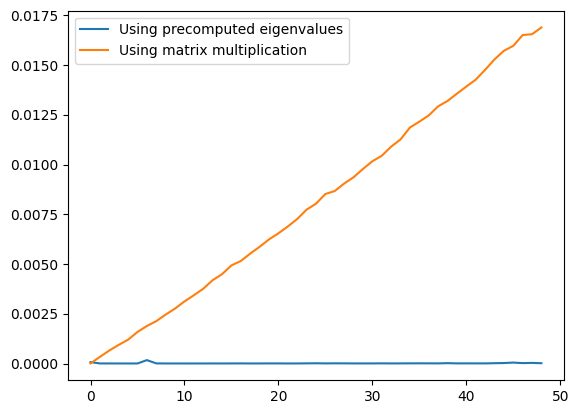

In [279]:
eigenvalues = np.linalg.eigvalsh(adj)
A = [eigenvalues]
for i in range(n-1):
    A.append(A[-1]*eigenvalues)
A = np.array(A)
i, j = 2, 3
Y = [np.linalg.matrix_power(adj, k)[i][j] for k in range(1, n+1)]

X = np.linalg.solve(A, Y)

tfasts = []
tslows = []
for k in range(1, 50):
  l = np.array([val**k for val in eigenvalues])
  t_start = perf_counter()
  res1 = round(X.dot(l))
  t_end = perf_counter()

  tfast = t_end - t_start
  tfasts.append(tfast)

  t_start = perf_counter()
  res2 = matrix_power(adj.tolist(), k)[i][j]
  t_end = perf_counter()

  tslow = t_end - t_start
  tslows.append(tslow)


plt.plot(tfasts, label="Using precomputed eigenvalues")
plt.plot(tslows, label="Using matrix multiplication")
plt.legend()
plt.show()
